**Stock Prediction**

<u>Take stock price of any company you want and predicts
its price by using LSTM. Use only Jupyter notebook
code.</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [3]:
data = data['Close'].values.reshape(-1, 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [5]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length, 0]
        label = data[i+seq_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [6]:
sequence_length = 10
sequences, labels = create_sequences(data_normalized, sequence_length)

In [7]:
train_size = int(len(sequences) * 0.8)
test_size = len(sequences) - train_size
X_train, X_test = sequences[0:train_size], sequences[train_size:]
y_train, y_test = labels[0:train_size], labels[train_size:]

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
5/5 - 2s - loss: 0.1473 - 2s/epoch - 383ms/step
Epoch 2/50
5/5 - 0s - loss: 0.0781 - 36ms/epoch - 7ms/step
Epoch 3/50
5/5 - 0s - loss: 0.0325 - 30ms/epoch - 6ms/step
Epoch 4/50
5/5 - 0s - loss: 0.0122 - 35ms/epoch - 7ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0172 - 33ms/epoch - 7ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0140 - 28ms/epoch - 6ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0099 - 28ms/epoch - 6ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0102 - 33ms/epoch - 7ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0100 - 39ms/epoch - 8ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0089 - 36ms/epoch - 7ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0081 - 37ms/epoch - 7ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0080 - 38ms/epoch - 8ms/step
Epoch 13/50
5/5 - 0s - loss: 0.0076 - 34ms/epoch - 7ms/step
Epoch 14/50
5/5 - 0s - loss: 0.0071 - 35ms/epoch - 7ms/step
Epoch 15/50
5/5 - 0s - loss: 0.0071 - 42ms/epoch - 8ms/step
Epoch 16/50
5/5 - 0s - loss: 0.0069 - 40ms/epoch - 8ms/step
Epoch 17/50
5/5 - 0s - loss: 0.0066 - 37ms/epoch 

In [11]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [12]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Root Mean Squared Error (RMSE): 8.693533588817514


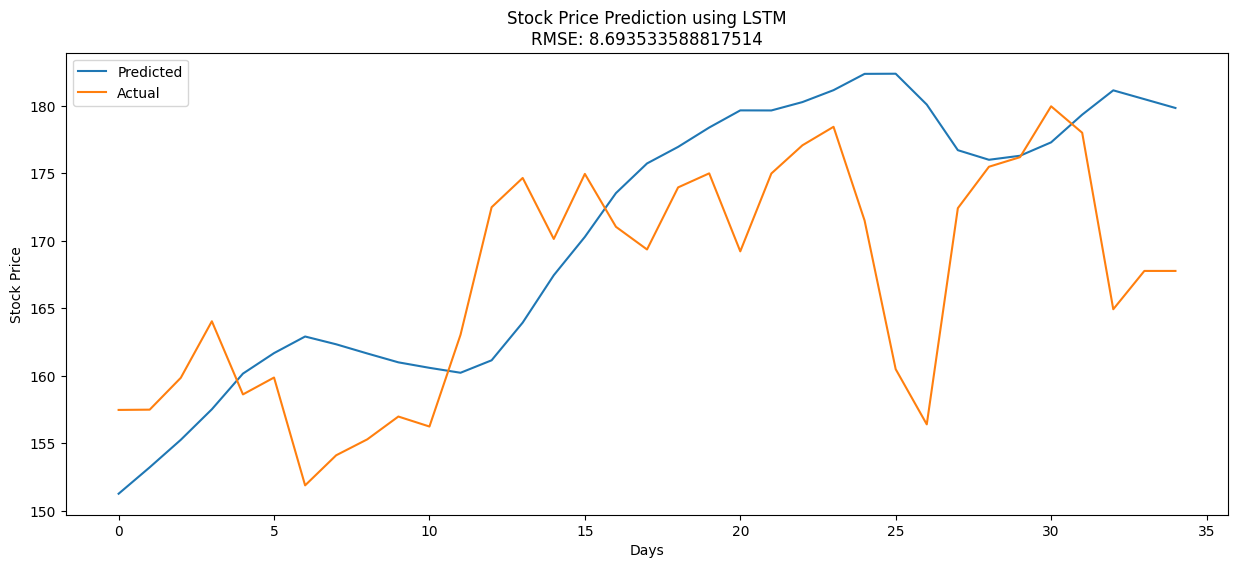

In [13]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


plt.figure(figsize=(15, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.title(f'Stock Price Prediction using LSTM\nRMSE: {rmse}')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
